In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import layers

## defining batch specfications
batch_size = 42
img_height = 224
img_width = 224


## loading training data
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    './iris-computer-vision',
    validation_split=0.2,
    subset= "training",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

## loading validation data
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    './iris-computer-vision',
    validation_split=0.1,
    subset= "validation",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

## loading testing data
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    './iris-computer-vision',
    validation_split=0.1,
    subset= "validation",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

class_names = training_ds.class_names


## Configuring dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
validation_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)

## definition of CNN

MyCnn = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2), ###### MITIGACIÓN OVERFITTING ######
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(len(class_names), activation= 'softmax')
])

MyCnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## train of CNN
retVal = MyCnn.fit(training_ds,validation_data= validation_ds,epochs = 5)

Found 421 files belonging to 3 classes.
Using 337 files for training.
Found 421 files belonging to 3 classes.
Using 42 files for validation.
Found 421 files belonging to 3 classes.
Using 42 files for validation.
Epoch 1/5
9/9 [==============================] - 73s 6s/step - loss: 4.9959 - accuracy: 0.3620 - val_loss: 1.1031 - val_accuracy: 0.3095
Epoch 2/5
9/9 [==============================] - 58s 6s/step - loss: 1.0812 - accuracy: 0.6053 - val_loss: 1.1092 - val_accuracy: 0.6429
Epoch 3/5
9/9 [==============================] - 50s 6s/step - loss: 1.0564 - accuracy: 0.6350 - val_loss: 1.0890 - val_accuracy: 0.6429
Epoch 4/5
9/9 [==============================] - 49s 5s/step - loss: 1.0868 - accuracy: 0.6350 - val_loss: 1.0824 - val_accuracy: 0.6429
Epoch 5/5
9/9 [==============================] - 39s 4s/step - loss: 1.0785 - accuracy: 0.6350 - val_loss: 1.0728 - val_accuracy: 0.6429


2/2 [==============================] - 1s 245ms/step


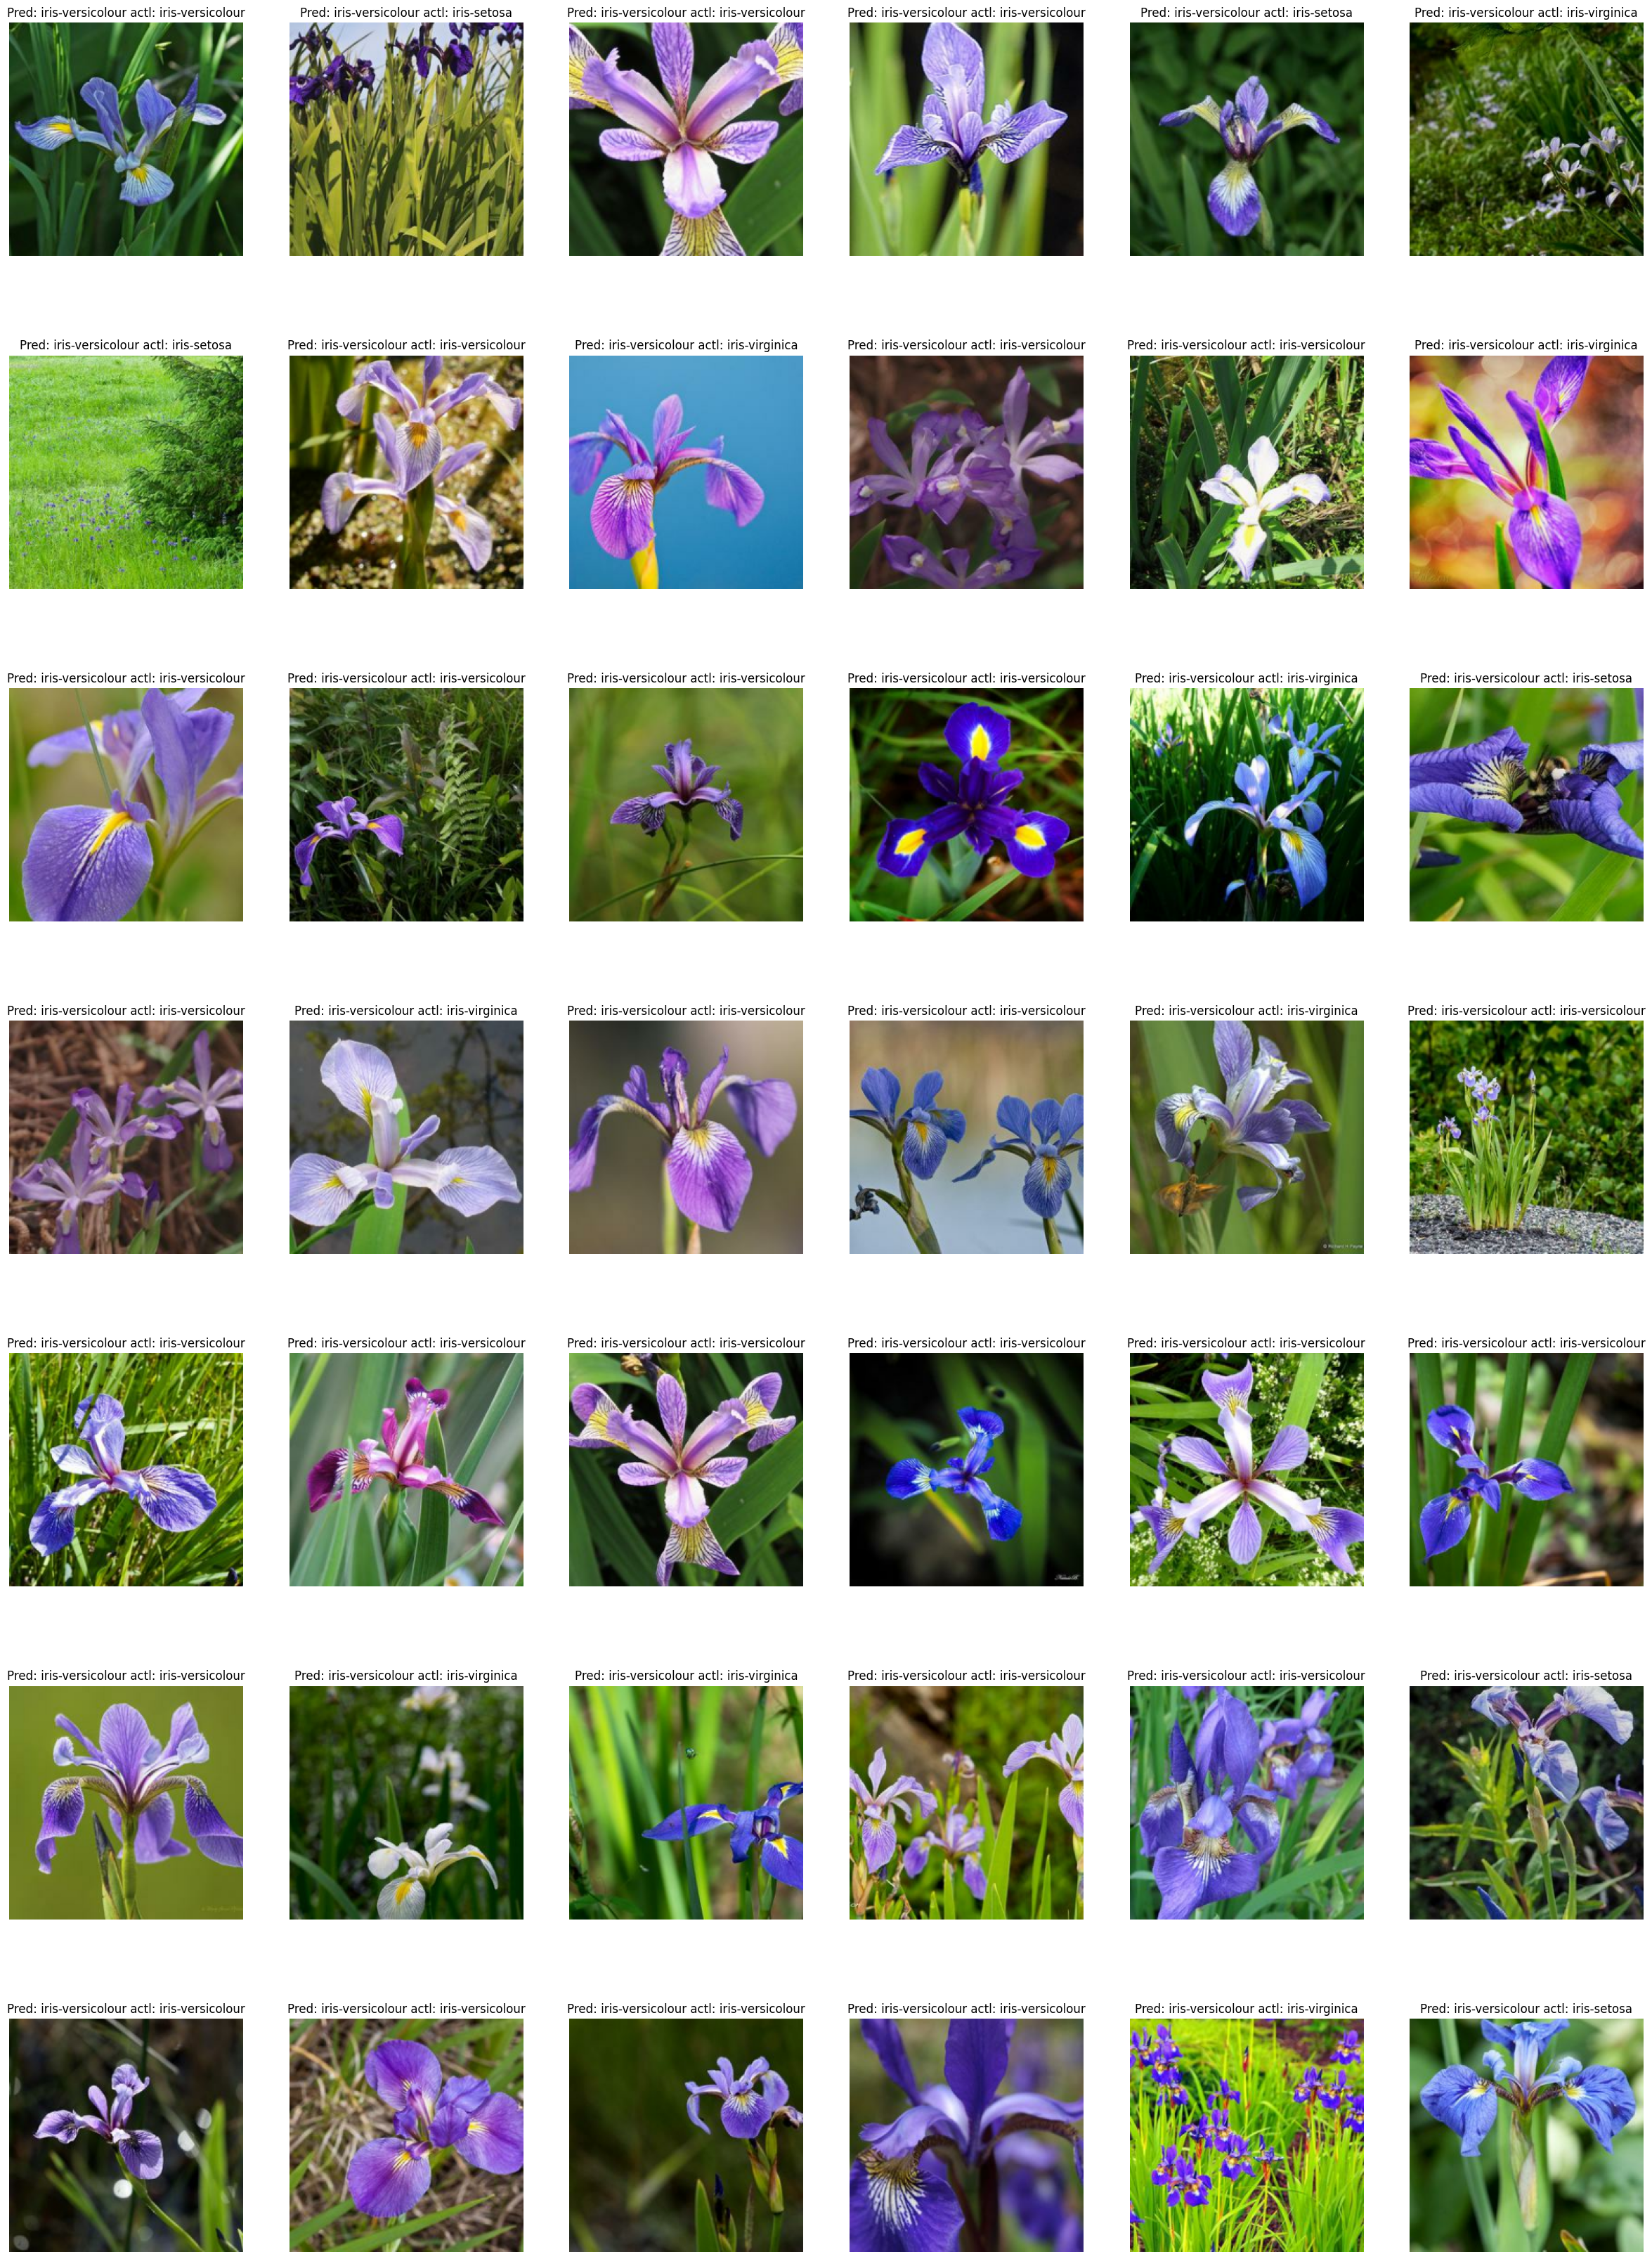

In [10]:
## plotting results of testing
plt.figure(figsize=(30, 42))
for images, labels in testing_ds.take(1):
    predictions = MyCnn.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(42):
        ax = plt.subplot(7, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl: '+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)

plt.show()

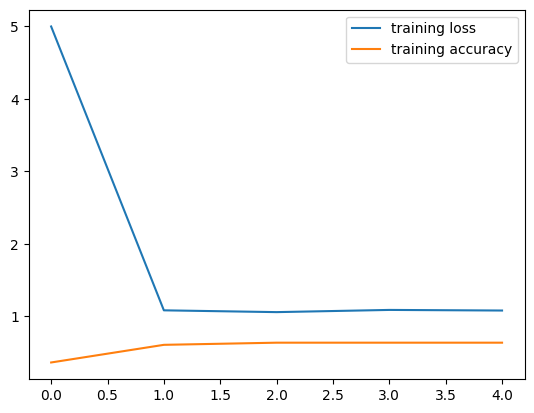

In [11]:
## training loss and accuracy
plt.plot(retVal.history['loss'], label = 'training loss')
plt.plot(retVal.history['accuracy'], label = 'training accuracy')
plt.legend()

plt.show()

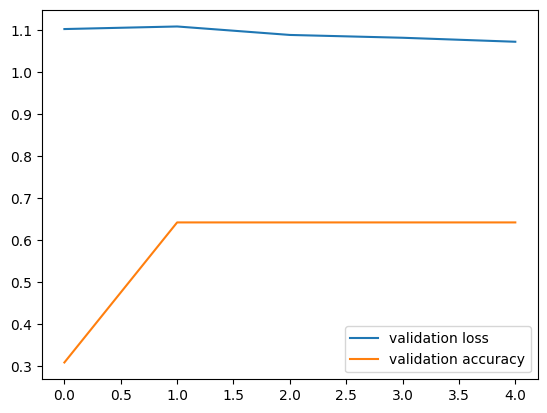

In [12]:
## validation loss and accuracy 
plt.plot(retVal.history['val_loss'], label = 'validation loss')
plt.plot(retVal.history['val_accuracy'], label = 'validation accuracy')
plt.legend()

plt.show()
